In [1]:
# just for testing
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Hands on Tutorial 1

# Introduction

When designing a synchrotron, the first thing to do is to make sure that the particles will be transversely guided, i.e. stay in the vicinity of a given closed orbit. This is the basic idea of linear optics. In linear optics we use linear magnets, i.e. **dipoles** (constant magnetic field) and **quadrupoles** (magnetic field is linear with transverse position). Around a given ring one places a set of identical **FODO** cells, in a periodic manner. The more symmetric is a machine, the better. The FODO cell will be the basic building block of the ring. Each FODO cell is made of one **focusing quadrupole**, one or several **dipoles**, one **defocusing quadrupole** and again one or several **dipoles** (using the same number as before). Between those elements there can be some unused space, or **drift** space. In practice in a real machine, many other elements and diagnostics instruments are put in these spaces, but we do not consider them now. Note that from the point of view of linear optics in the thin lens approximation, a dipole is equivalent to a drift space (weak focusing is neglected). Dipoles are there only to guide the beam along the orbit, while quadrupoles focus it so that it stays near this orbit.

In a previous tutorial, you have started the design of a small storage ring by hand. The purpose of the next four tutorials is to show that such a design can be done in an easier way using **python**. We will walk you through the first steps of the design of a collider.  The most interesting part is, however, not the coding: we would like you to understand what you are observing in the output of the code and to improve your understanding of the pysics involved. We will ask you some questions to guide you.

At the end of the four sessions, you have the possibility to **hand in a small report (4-5 pages max!), summarizing your results**, i.e. plots and answers to the questions. The goal is to show that you are able to extract useful information to guide the design of a machine and to understand the physical ideas behind it. To help you write your report, try to keep track of what you are doing, e.g. collect the different plots, interpret physically the obtained results, etc.


# Jupyter notebook

You will be using [jupyter notebooks](https://jupyter.org/) to run some code. Jupyter is a web based code block frontend for [python](https://www.python.org/).

For those of you who have never used python or want to brush up on the basics, we recommend  having a look at https://www.pythoncheatsheet.org/ for some syntax reminders. **No advanced knowledge of python will be required.**

You will be using an accelerator tool box package, for the curious, the source code is located [here](https://github.com/loiccoyle/accelerator).

# Import and helper functions

In [2]:
# let's import everything from the toolbox
from pyaccelerator import *
# along with numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_beta(beta_h, beta_v, s):
    """Plot the beta functions.
    """
    fig, axes = plt.subplots(1, 1)
    axes.plot(s, beta_h, label='beta h')
    axes.plot(s, beta_v, label='beta v')
    axes.legend()
    plt.xlabel('s [m]')
    plt.ylabel('beta [m]')
    return fig, axes

# Exercise 1

We will design the machine that you already studied in a previous tutorial. To remind you, the parameters of the this machine are listed bellow:
 * Particles: proton
 * Kinetic energy: 15 GeV
 * Circumference: 1000 m
 * Quadrupole length: 3 m
 * Dipole length: 5 m
 * Maximum magnetic field in dipoles: 2 T
 * 8 FODO cells

During the last tutorial, you have found the number of FODO cells and the strength of the dipoles required to close the ring.

**Set the correct values for `n_cells`, `dipole_angle` and `dipole_bending_radius`.**

**What do you observe? What happens if you play with the dipole field strength? Why?**

In [4]:
circumference = 1000  # meters
proton_energy = 15  # GeV
dipole_length = 5  # meters
dipole_B_max = 2  # T

In [5]:
n_cells = 8  # ??
dipole_angle = np.pi / 16  # ??

In [6]:
cell_length = circumference / n_cells
drift = Drift(cell_length / 6)
dipole_thin = DipoleThin(dipole_angle)
# We create the repeating FODO cell (containing only dipoles)
FODO_dipole = Lattice([drift, dipole_thin, drift, dipole_thin, drift,
                       drift, dipole_thin, drift, dipole_thin, drift])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

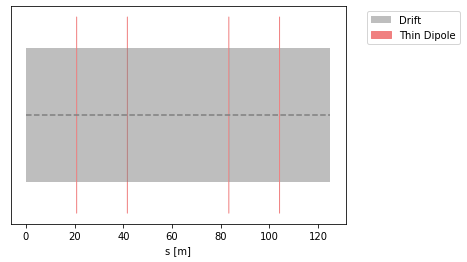

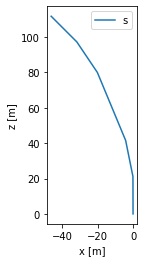

In [7]:
# let's have a look at our 'FODO'
FODO_dipole.plot.layout()
FODO_dipole.plot.top_down()

In [8]:
# We repeat it to create the full lattice
lattice_dipole = FODO_dipole * n_cells

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

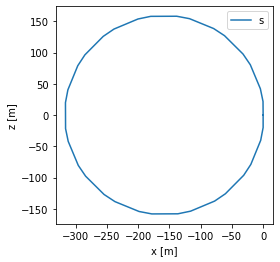

In [9]:
lattice_dipole.plot.top_down()

# Exercise 2

### Part 1: thin elements

The synchrotron obtained up to now, containing only dipoles, will not work, we have to add quadrupoles. **Why?**

During the last tutorial, you computed the strength of the quadrupole in the FODO cell, such that the maximum of the β-function is 300 m. In the approximation that was used the maximum of the function in a FODO cell is given by:

$\beta_{max} = \frac{2f (1+\frac{L}{4f})}{\sqrt{1 - \frac{L^2}{16f^2}}}$

**What is the approximation used in this formula?** Solving this equation for $\beta_{max}= 300m$ you should have found in Tutorial 4 the integrated gradient, i.e. the inverse of the focal length, as well as the quadrupolar strength.

In [10]:
quad_focal_length = 1 / 8.89e-3 # ??

In [11]:
half_quad_f_thin = QuadrupoleThin(quad_focal_length*2, name="quad_thin_f")
quad_d_thin = QuadrupoleThin(-quad_focal_length, name="quad_thin_d")
# We take the same FODO as exercise 1 and add some quadupoles
FODO_thin = Lattice([half_quad_f_thin,
                     drift, dipole_thin,
                     drift, dipole_thin,
                     drift,
                     quad_d_thin,
                     drift,
                     dipole_thin, drift,
                     dipole_thin, drift,
                     half_quad_f_thin])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

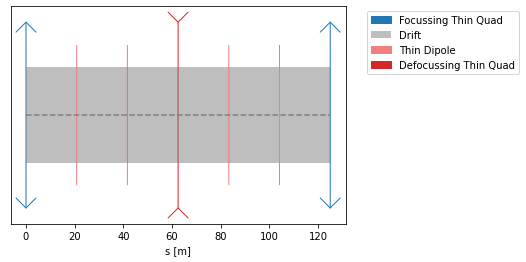

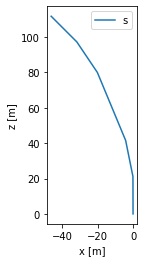

In [12]:
# let's have a look at our FODO
FODO_thin.plot.layout()
FODO_thin.plot.top_down()

In [13]:
# We repeat it to create the full lattice
lattice_thin = FODO_thin * n_cells

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

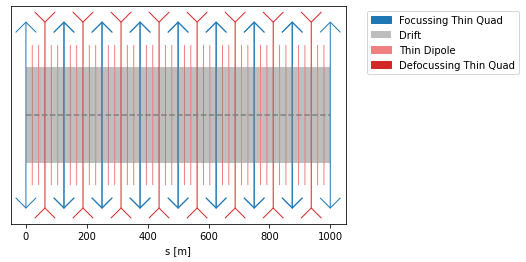

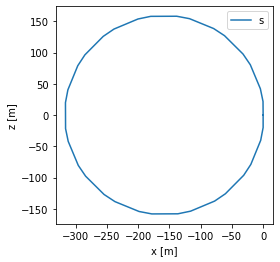

In [14]:
lattice_thin.plot.layout()
lattice_thin.plot.top_down()

We now have a lattice, **is the stability condition met?**

In [15]:
lattice_thin.m

TransferMatrix([[-2.06630120e-01, -2.92793717e+02,  0.00000000e+00,
                  0.00000000e+00,  0.00000000e+00],
                [ 3.26955101e-03, -2.06630120e-01,  0.00000000e+00,
                  0.00000000e+00,  0.00000000e+00],
                [ 0.00000000e+00,  0.00000000e+00, -2.06630120e-01,
                 -1.65479648e+02,  0.00000000e+00],
                [ 0.00000000e+00,  0.00000000e+00,  5.78502557e-03,
                 -2.06630120e-01,  0.00000000e+00],
                [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                  0.00000000e+00,  1.00000000e+00]])

In [16]:
lattice_thin.m.h

TransferMatrix([[-2.06630120e-01, -2.92793717e+02],
                [ 3.26955101e-03, -2.06630120e-01]])

In [17]:
lattice_thin.m.v

TransferMatrix([[-2.06630120e-01, -1.65479648e+02],
                [ 5.78502557e-03, -2.06630120e-01]])

In [18]:
np.trace(lattice_thin.m.h)  # ??

-0.4132602406943339

In [19]:
np.trace(lattice_thin.m.v)  # ??

-0.4132602406943345

If the stability is met, we can proceed to compute the $\beta$ function in both the horizontal and vertical planes along the lattice.

In [20]:
twiss_thin_h = lattice_thin.twiss('h')
twiss_thin_v = lattice_thin.twiss('v')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='s [m]', ylabel='beta [m]'>)

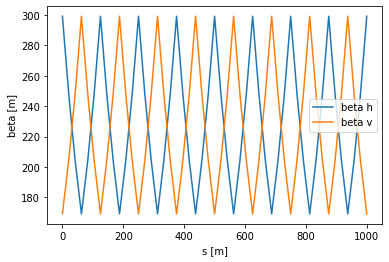

In [21]:
plot_beta(twiss_thin_h.beta, twiss_thin_v.beta, twiss_thin_h.s)

**Where are the maxima of the functions located in the FODO cell?**


**Where is the maximum of the function in one plane with respect to the other plane?**


**What is the value of the function at that location? Why?**

### Part 2: thick elements

In real accelerators we of course have thick elements. So let's switch out the thin elements for thick ones.

In [22]:
quad_length = 3
quad_strength = 8.89e-3 / quad_length

dipole_length = 5
dipole_angle = np.pi / 16
dipole_bending_radius = dipole_length / dipole_angle

# reduce the drift lengths to compensate for the now thick elements
drift_length = (circumference / n_cells - (2 * quad_length) - (4 * dipole_length)) / 6

In [23]:
half_quad_f = Quadrupole(quad_strength, quad_length/2, name="quad_f")
quad_d = Quadrupole(-quad_strength, quad_length, name="quad_d")

dipole = Dipole(dipole_bending_radius, dipole_angle)

drift = Drift(drift_length)
# We take the same FODO as exercise 1 and add some quadupoles
FODO_thick = Lattice([half_quad_f, drift, dipole, drift, dipole, drift,
                                  quad_d, drift, dipole, drift, dipole, drift, half_quad_f])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

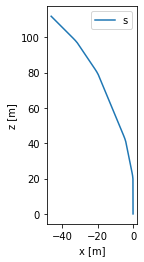

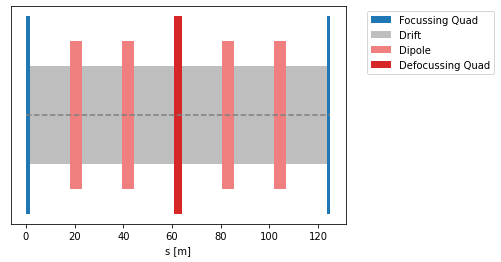

In [24]:
FODO_thick.plot.top_down()
FODO_thick.plot.layout()

In [25]:
lattice_thick = FODO_thick * n_cells

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

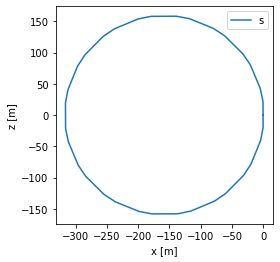

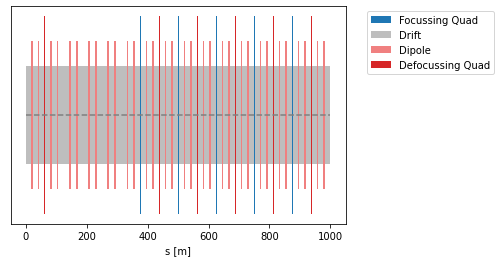

In [26]:
lattice_thick.plot.top_down()
lattice_thick.plot.layout()

In [27]:
twiss_h = lattice_thick.twiss('h')
twiss_v = lattice_thick.twiss('v')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='s [m]', ylabel='beta [m]'>)

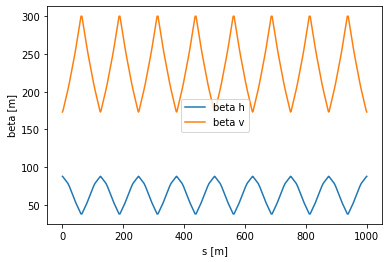

In [28]:
plot_beta(twiss_h.beta, twiss_v.beta, twiss_v.s)

**Is the maximum of the $\beta$ function correct for the horizontal plane? Why?**

**Is the maximum of the $\beta$ function correct for the vertical plane? Why?**

We can also compute the dispersion functions. **Recall the definition and interpretation of the dispersion function.**

Look at the dispersion plot bellow, **Why is the dispersion different in both planes?**

In [29]:
disp = lattice_thick.dispersion()

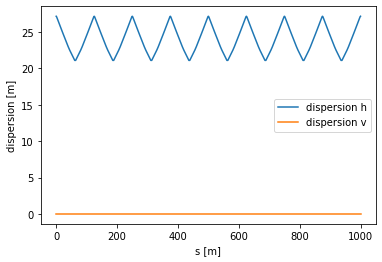

In [30]:
plt.plot(disp.s, disp.x, label='dispersion h')
plt.plot(disp.s, disp.y, label='dispersion v')
plt.legend()
plt.xlabel('s [m]')
plt.ylabel('dispersion [m]')
plt.show()

The ring developed until now is rather inconsistent, as one can infer from comparing the results between thin and thick lenses: in a well designed accelerator one expects smaller differences between thin and thick elements in order to use the then valid thin lens approximation. So now it is time to optimize our FODO cell. We are going to come back to the thin lenses for this exercise to simplify it a bit.

##### Some helper functions:

In [31]:
from scipy import integrate

def thin_lattice_factory(quad_strength: float, n_cells: float = n_cells) -> Lattice:
    """Create a thin lattice given the quadrupolar strength and the number of cells."""
    half_quad_f_thin = QuadrupoleThin(2 * 1/quad_strength, name="quad_thin_f")
    quad_d_thin = QuadrupoleThin(-1/quad_strength, name="quad_thin_d")
    drift = Drift(circumference / n_cells / 6)
    dipole = DipoleThin(dipole_angle)
    FODO_thin = Lattice([half_quad_f_thin,
                         drift, dipole,
                         drift, dipole,
                         drift,
                         quad_d_thin,
                         drift,
                         dipole, drift,
                         dipole, drift,
                         half_quad_f_thin])
    return FODO_thin * n_cells

def compute_whole_tune(beta: np.ndarray, s: np.ndarray) -> float:
    """Compute the tune from the beta function."""
    return integrate.trapz(1/beta, s) / (2 * np.pi)

# Exercise 3

Try to change the quadrupole strength in steps, let’s say of the order of $10^{-4}$.

**How do the tunes vary with the quadrupole strength? why?**

Using this method (or with the derivative function $\frac{\delta \beta_{max}}{\delta f}$), try to reduce the maximum of the $\beta$ as much as you can. **Why would one want to do that? What is the minimum you manange to acheive? What happens if you increase or decrease the quadrupole strengths too much?**

Let us assume the maximum $\beta$ function acceptable in this machine is 100m. **What parameter can you change in order to achieve this value?** Find new parameters that allow you to acheive this minimum.

**What are the new tune values? What is the difference?**

**Comment on the relative difference between the maximum of the horizontal and vertical $\beta$ functions in this case compared to the previous case.**

_the difference between the beta functions of both planes is always 0 as we have thin lenses?_

In [32]:
start = 8.89e-3
step = 4e-4
number = 50

tunes = []
beta_maxes = []
strengths = []
scan_strengths = np.arange(start, start + step * number, step)
for strength in scan_strengths:
    lattice = thin_lattice_factory(strength)
    try:
        s, beta, _, _ = lattice.twiss()
    except ValueError:
        continue
    strengths.append(strength)
    tunes.append(compute_whole_tune(beta, s))
    beta_maxes.append(max(beta))

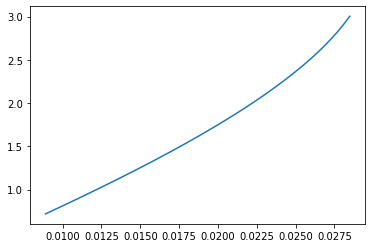

In [33]:
plt.plot(strengths, tunes)

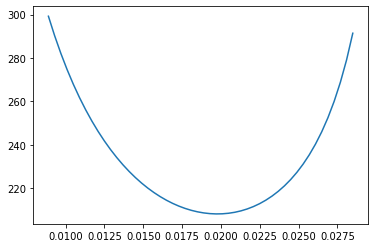

In [34]:
plt.plot(strengths, beta_maxes)

In [35]:
scan_n_cells = range(n_cells, n_cells + 50)

beta_maxes_grid = []
for n_cells_ in scan_n_cells:
    for strength in scan_strengths:
        lattice = thin_lattice_factory(strength, n_cells_)
        s, beta, *_ = lattice.twiss()
        beta_maxes_grid.append(max(beta))

strengths_grid, n_cells_grid = np.meshgrid(scan_strengths, scan_n_cells)
beta_maxes_grid = np.array(beta_maxes_grid).reshape((strengths_grid.shape))

Text(0, 0.5, 'n_cells')

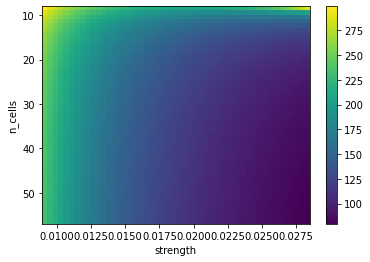

In [36]:
plt.imshow(beta_maxes_grid,
           extent=(scan_strengths[0], scan_strengths[-1], scan_n_cells[-1], scan_n_cells[0]),
           aspect='auto')
plt.colorbar()
plt.xlabel('strength')
plt.ylabel('n_cells')

In [37]:
# possible combinations
for strength, n_cells_ in zip(strengths_grid[beta_maxes_grid <= 100], n_cells_grid[beta_maxes_grid <= 100]):
    print(strength, n_cells_)

0.028489999999999967 21
0.02808999999999997 22
0.028489999999999967 22
0.027289999999999967 23
0.02768999999999997 23
0.02808999999999997 23
0.028489999999999967 23
0.02688999999999997 24
0.027289999999999967 24
0.02768999999999997 24
0.02808999999999997 24
0.028489999999999967 24
0.026489999999999972 25
0.02688999999999997 25
0.027289999999999967 25
0.02768999999999997 25
0.02808999999999997 25
0.028489999999999967 25
0.026089999999999974 26
0.026489999999999972 26
0.02688999999999997 26
0.027289999999999967 26
0.02768999999999997 26
0.02808999999999997 26
0.028489999999999967 26
0.02568999999999997 27
0.026089999999999974 27
0.026489999999999972 27
0.02688999999999997 27
0.027289999999999967 27
0.02768999999999997 27
0.02808999999999997 27
0.028489999999999967 27
0.025289999999999972 28
0.02568999999999997 28
0.026089999999999974 28
0.026489999999999972 28
0.02688999999999997 28
0.027289999999999967 28
0.02768999999999997 28
0.02808999999999997 28
0.028489999999999967 28
0.0248899999

In [38]:
thin_lattice = thin_lattice_factory(0.01419, 20)
s, beta_h, *_ = thin_lattice.twiss(plane='h')
s, beta_v, *_ = thin_lattice.twiss(plane='v')

In [39]:
compute_whole_tune(beta_h, s)

1.1365499006850006

In [40]:
compute_whole_tune(beta_v, s)

1.1365499006850022

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='s [m]', ylabel='beta [m]'>)

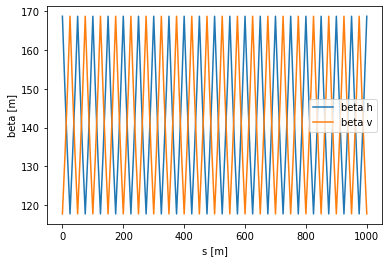

In [41]:
plot_beta(beta_h, beta_v, s)